In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv('report.csv')

In [1]:
def parseWeekNum(oldName):
    # columns names are in the format YYYY for 
    # first week or w.YYYY for the rest
    if '.' not in oldName:
        return '1'
    _, week = oldName.split('.')
    return str(int(week)+1)
    
def getMortality(ageGroup, year):
    res = data.loc[data['AgeGroup'] == ageGroup, data.columns.str.startswith(year)]
    res.columns = [ parseWeekNum(col) for col in res.columns]
    return res

def avgMortalityPreCov(ageGroup):
    res = pd.DataFrame(getMortality(ageGroup, '2015'))
    for year in range(2016, 2020, 1):
        res = res.append(getMortality(ageGroup, str(year)))
    return res.reset_index(drop=True).mean()

def plotMortality(ageGroup):
    avg = avgMortalityPreCov(ageGroup)
    plt.plot(avg, label='avg', color='red', linestyle='dashed')
    
    for year in range(2020, 2022,1):
        mortality = getMortality(ageGroup, str(year))
        plt.plot(mortality.columns, mortality.to_numpy()[0], label = year)
        
    plt.xlabel('weeks')
    ax = plt.gca()
    ax.set_xticks(np.arange(0, 52, 4))
    ax.axes.xaxis.set_ticklabels([str(v) for v in np.arange(0, 52, 4)])
    
    plt.ylabel('deaths')
    ax.set_xlim([1, 53])
    
    plt.title('Mortality for age group ' + ageGroup)
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
    
    plt.show()

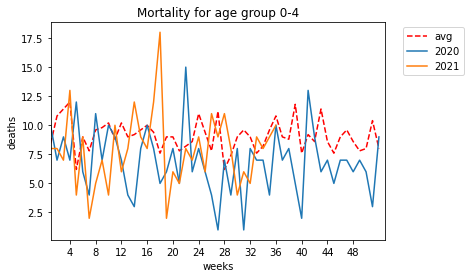

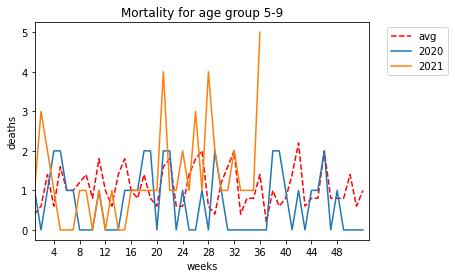

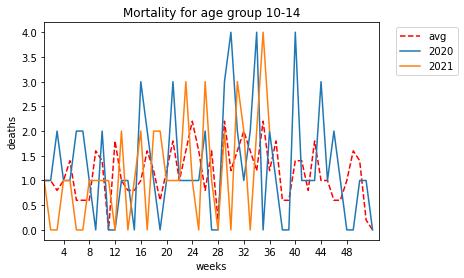

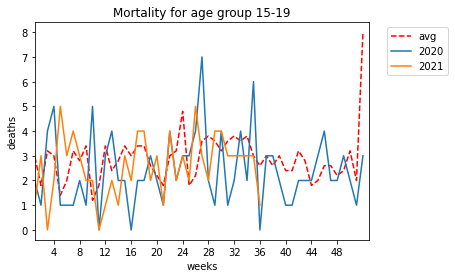

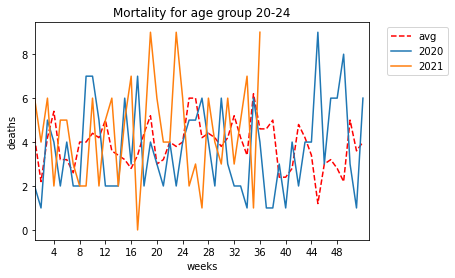

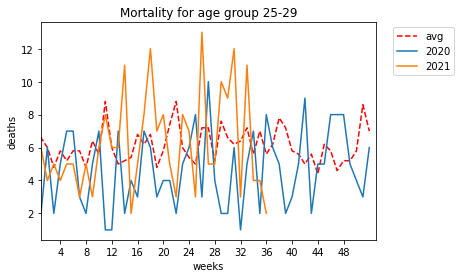

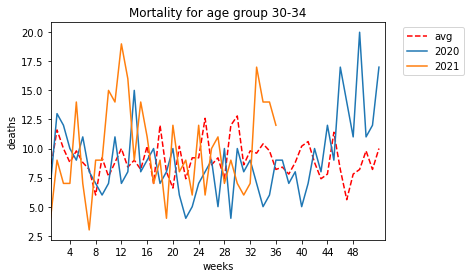

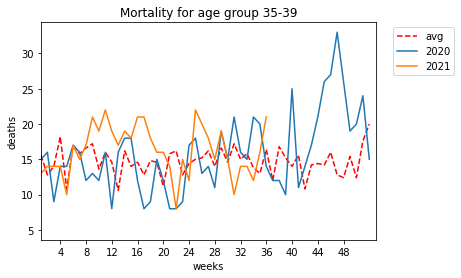

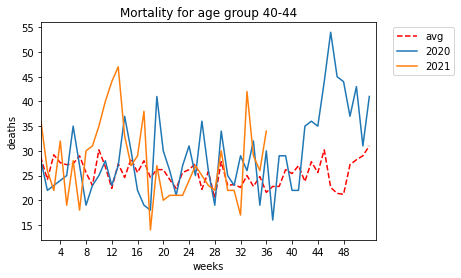

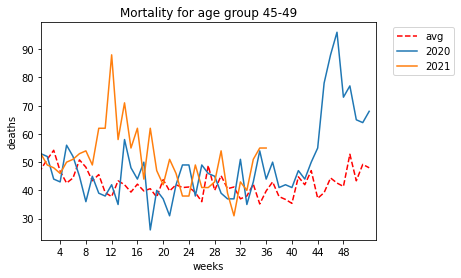

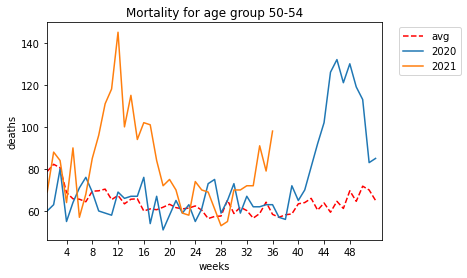

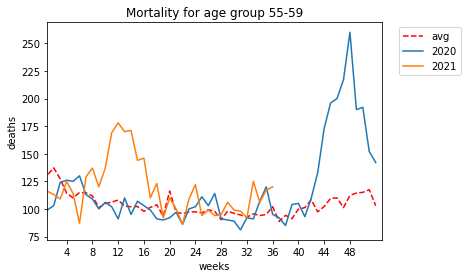

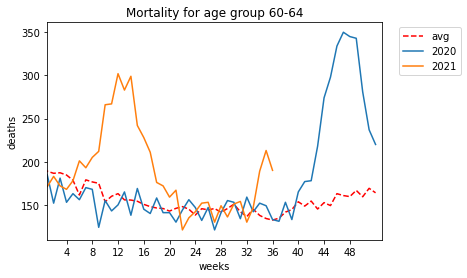

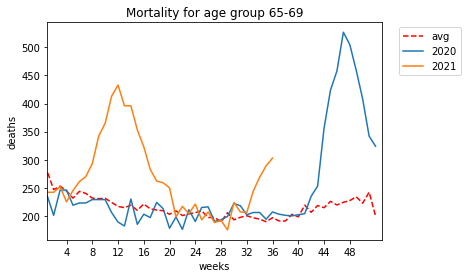

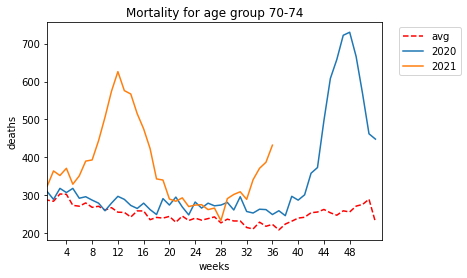

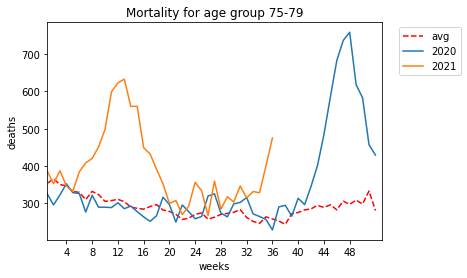

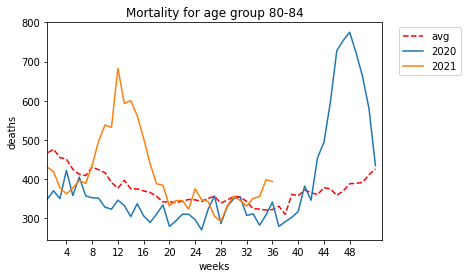

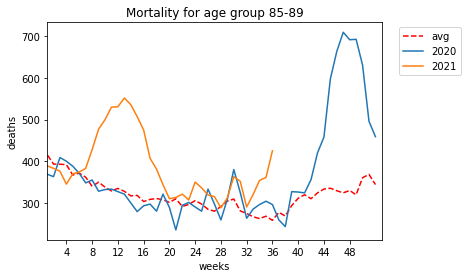

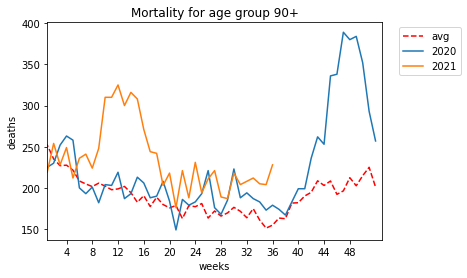

In [46]:
for ageGroup in data['AgeGroup'].to_numpy():
    plotMortality(ageGroup)